# Classification Of Brain Tumors - Model Creation and Evaluation

This notebook is the 4th Step in creating a working model for Brain Tumor Classification Problem and lists down the following:

1. Create VGG-16 Model using CNN for your Train data and then Evaluate them on the Test Data.

## Step-0: Installing the required libraries

In [ ]:
#Installing Keras
! pip install Keras

In [ ]:
#Installing Tensorflow
! pip install tensorflow

## Step-1: Loading the data into Dataframes

In [1]:
#load required python packages
import os
import shutil
from os import listdir
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from PIL import Image
import seaborn as sns
import keras
from keras.models import Sequential, Model
from keras.layers import Dense, Conv2D, MaxPool2D , Flatten, Input
from keras.layers.merge import concatenate
from keras.preprocessing.image import ImageDataGenerator
from keras.preprocessing import image
from keras.utils import plot_model
%matplotlib inline

In [2]:
#Print the current working directory
path = os.getcwd()
print(path)

d:\Learning\Springboard\GitHub\Classification-Brain-Tumors


In [3]:
#Create 2 new Path variables so that they point to 'Train' and 'Test' Directories
train_path = os.path.join(path,'Train')
test_path = os.path.join(path,'Test')
predict_path = os.path.join(path,'Prediction Images')

In [5]:
#Reading Images & Loading the image data from Train & Tests folder into a Dataframes
train = ImageDataGenerator()
train_df = train.flow_from_directory(train_path, target_size = (150,150))
test = ImageDataGenerator()
test_df = train.flow_from_directory(test_path, target_size = (150,150))

Found 2821 images belonging to 2 classes.
Found 704 images belonging to 2 classes.


## Step-2: Creating 1st Model- VGG-16

### Adding the below layers in the given order

1. 2 Convolution Layers of 64 channel of 3x3 kernal and same padding.
2. Maxpool layer of 2x2 pool size and stride 2x2.
3. 2 Convolution Layers of 128 channel of 3x3 kernal and same padding.
4. Maxpool layer of 2x2 pool size and stride 2x2.
5. 3 Convolution Layers of 256 channel of 3x3 kernal and same padding.
6. Maxpool layer of 2x2 pool size and stride 2x2.
7. 3 Convolution Layers of 512 channel of 3x3 kernal and same padding.
8. Maxpool layer of 2x2 pool size and stride 2x2.
9. 3 Convolution Layers of 512 channel of 3x3 kernal and same padding.
10. Maxpool layer of 2x2 pool size and stride 2x2.

Each of these layers have a ReLu Activation as well so that negative values are not passed to the next layer.

In [5]:
#Adding 2 Convolution Layers (step-1)
vgg16 = Sequential()
vgg16.add(Conv2D(input_shape = (150,150,3), filters = 64, kernel_size = (3,3), padding = "same", activation = 'relu'))
vgg16.add(Conv2D(filters = 64, kernel_size = (3,3), padding = "same", activation = 'relu'))

In [6]:
#Adding Maxool layer (step-2)
vgg16.add(MaxPool2D(pool_size = (2, 2), strides = (2, 2)))

In [7]:
#Adding 2 Convolution Layers (step-3)
vgg16.add(Conv2D(filters = 128, kernel_size = (3,3), padding = "same", activation = 'relu'))
vgg16.add(Conv2D(filters = 128, kernel_size = (3,3), padding = "same", activation = 'relu'))

In [8]:
#Adding Maxool layer (step-4)
vgg16.add(MaxPool2D(pool_size = (2, 2), strides = (2, 2)))

In [9]:
#Adding 3 Convolution Layers (step-5)
vgg16.add(Conv2D(filters = 256, kernel_size = (3,3), padding = "same", activation = 'relu'))
vgg16.add(Conv2D(filters = 256, kernel_size = (3,3), padding = "same", activation = 'relu'))
vgg16.add(Conv2D(filters = 256, kernel_size = (3,3), padding = "same", activation = 'relu'))

In [10]:
#Adding Maxool layer (step-6)
vgg16.add(MaxPool2D(pool_size = (2, 2), strides = (2, 2)))

In [11]:
#Adding 3 Convolution Layers (step-7)
vgg16.add(Conv2D(filters = 512, kernel_size = (3,3), padding = "same", activation = 'relu'))
vgg16.add(Conv2D(filters = 512, kernel_size = (3,3), padding = "same", activation = 'relu'))
vgg16.add(Conv2D(filters = 512, kernel_size = (3,3), padding = "same", activation = 'relu'))

In [12]:
#Adding Maxool layer (step-8)
vgg16.add(MaxPool2D(pool_size = (2, 2), strides = (2, 2)))

In [13]:
#Adding 3 Convolution Layers (step-9)
vgg16.add(Conv2D(filters = 512, kernel_size = (3,3), padding = "same", activation = 'relu'))
vgg16.add(Conv2D(filters = 512, kernel_size = (3,3), padding = "same", activation = 'relu'))
vgg16.add(Conv2D(filters = 512, kernel_size = (3,3), padding = "same", activation = 'relu'))

In [14]:
#Adding Maxool layer (step-10)
vgg16.add(MaxPool2D(pool_size = (2, 2), strides = (2, 2)))

### Flatten the data coming out of the above convolutions and perform the following:

1. Flatten the resulting data.
2. Create 2 Dense layers of 4096 units.
3. Create a Dense Softmax layer of 2 units.

In [15]:
# Flatten the image and perform the above the steps.
vgg16.add(Flatten())
vgg16.add(Dense(units = 4096, activation = "relu"))
vgg16.add(Dense(units = 4096, activation = "relu"))
vgg16.add(Dense(units = 2, activation = "softmax"))

### Compile the above model using 'Adam' Optimizer

In [16]:
#Compiling the created Model.
vgg16.compile(optimizer = 'adam', loss = 'binary_crossentropy', metrics = ['accuracy'])

In [17]:
#Printing the Summary of the created model
print(vgg16.summary())

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 150, 150, 64)      1792      
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 150, 150, 64)      36928     
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 75, 75, 64)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 75, 75, 128)       73856     
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 75, 75, 128)       147584    
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 37, 37, 128)       0         
_________________________________________________________________
conv2d_4 (Conv2D)            (None, 37, 37, 256)       2

### Now let's Train the Model on our Train data

In [18]:
from keras.callbacks import ModelCheckpoint, EarlyStopping
checkpoint = ModelCheckpoint("vgg16_1.h5", monitor='val_accuracy', verbose=1, save_best_only=True, save_weights_only=False, mode='auto')
early = EarlyStopping(monitor='val_accuracy', min_delta=0, patience=20, verbose=1, mode='auto')
hist = vgg16.fit_generator(steps_per_epoch=50,generator=train_df, validation_data= test_df, validation_steps=10,epochs=50,callbacks=[checkpoint,early])

Instructions for updating:
Please use Model.fit, which supports generators.
Epoch 1/50
50/50 [==============================] - ETA: 0s - loss: 2.4753 - accuracy: 0.8356 
Epoch 00001: val_accuracy improved from -inf to 0.81563, saving model to vgg16_1.h5
50/50 [==============================] - 1625s 33s/step - loss: 2.4753 - accuracy: 0.8356 - val_loss: 2.8278 - val_accuracy: 0.8156
Epoch 2/50
50/50 [==============================] - ETA: 0s - loss: 2.8081 - accuracy: 0.8169 
Epoch 00002: val_accuracy improved from 0.81563 to 0.84688, saving model to vgg16_1.h5
50/50 [==============================] - 1214s 24s/step - loss: 2.8081 - accuracy: 0.8169 - val_loss: 2.3485 - val_accuracy: 0.8469
Epoch 3/50
50/50 [==============================] - ETA: 0s - loss: 2.4571 - accuracy: 0.8398 
Epoch 00003: val_accuracy did not improve from 0.84688
50/50 [==============================] - 1480s 30s/step - loss: 2.4571 - accuracy: 0.8398 - val_loss: 2.4443 - val_accuracy: 0.8406
Epoch 4/50
50/50 

### Lets plot the Accuracy with each Epoch

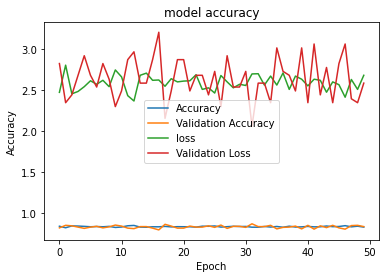

In [19]:
plt.plot(hist.history["accuracy"])
plt.plot(hist.history['val_accuracy'])
plt.plot(hist.history['loss'])
plt.plot(hist.history['val_loss'])
plt.title("model accuracy")
plt.ylabel("Accuracy")
plt.xlabel("Epoch")
plt.legend(["Accuracy","Validation Accuracy","loss","Validation Loss"])
plt.show()

## Thus, after training, our model has an Accuracy of 86.56%

### Lets load the best saved model and then make our predictions using Prediction Images.

In [6]:
#Loading our saved model
from keras.models import load_model
vgg16 = load_model("vgg16_1.h5")

#Making Predictions
pred = {}
for fl in listdir(os.path.join(predict_path,'Yes')):    
    img = image.load_img(os.path.join(predict_path,'Yes',fl))
    img = np.asarray(img)
    img = np.expand_dims(img, axis=0)
    output = vgg16.predict(img)
    if(output[0][0] > output[0][1]):
        pred[fl] = 'N'
    else:
        pred[fl] = 'Y'
for fl in listdir(os.path.join(predict_path,'No')):    
    img = image.load_img(os.path.join(predict_path,'No',fl))
    img = np.asarray(img)
    img = np.expand_dims(img, axis=0)
    output = vgg16.predict(img)
    if(output[0][0] > output[0][1]):
        pred[fl] = 'Y'
    else:
        pred[fl] = 'N'

In [7]:
print(pred)

{'Y_1.JPG': 'Y', 'Y_10.JPG': 'Y', 'Y_11.JPG': 'Y', 'Y_12.JPG': 'Y', 'Y_13.JPG': 'Y', 'Y_14.JPG': 'Y', 'Y_15.JPG': 'Y', 'Y_16.JPG': 'Y', 'Y_17.JPG': 'Y', 'Y_18.JPG': 'Y', 'Y_19.JPG': 'Y', 'Y_2.JPG': 'Y', 'Y_20.JPG': 'Y', 'Y_3.JPG': 'Y', 'Y_4.JPG': 'Y', 'Y_5.JPG': 'Y', 'Y_6.JPG': 'Y', 'Y_7.JPG': 'Y', 'Y_8.JPG': 'Y', 'Y_9.JPG': 'Y', 'N_1.JPG': 'N', 'N_10.JPG': 'N', 'N_11.JPG': 'N', 'N_12.JPG': 'N', 'N_13.JPG': 'N', 'N_14.JPG': 'N', 'N_15.JPG': 'N', 'N_16.JPG': 'N', 'N_17.JPG': 'N', 'N_18.JPG': 'N', 'N_19.JPG': 'N', 'N_2.JPG': 'N', 'N_20.JPG': 'N', 'N_3.JPG': 'N', 'N_4.JPG': 'N', 'N_5.JPG': 'N', 'N_6.JPG': 'N', 'N_7.JPG': 'N', 'N_8.JPG': 'N', 'N_9.JPG': 'N'}


In [12]:
# Counting the Images classified Correctly and Incorrectly.
correct = 0
wrong = 0
for key,val in pred.items():
    if(key[0] == val):
        correct += 1
    else:
        wrong += 1
print("Correct Classification: " + str(correct))
print("Incorrect Classification: " + str(wrong))

Correct Classification: 40
Incorrect Classification: 0


## Thus, it looks like Our created model was able to classify all the Images for prediction Correctly.